In [94]:
#import the required libraries here
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import norm

import pyfolio as pf

%matplotlib inline

In [95]:
tickers = ['FSLY','IMMR', 'MTTR', 'FB', 'RBLX', 'META', 'U']

start_date = '2021-06-29'
end_date = '2021-12-31'

panel_data = data.DataReader(tickers,'yahoo', start_date, end_date)
panel_data = panel_data.loc['2021-07-01' : '2021-12-31']
data = panel_data[['Close', 'Adj Close']]
data.head()

Attributes      Close                                                         \
Symbols          FSLY  IMMR   MTTR          FB       RBLX   META           U   
Date                                                                           
2021-07-01  58.020000  8.49  15.98  354.390015  85.820000  14.89  105.839996   
2021-07-02  56.470001  8.46  15.52  354.700012  86.199997  15.00  106.089996   
2021-07-06  56.860001  8.22  15.09  352.779999  86.980003  15.01  106.650002   
2021-07-07  54.369999  8.23  14.77  350.489990  86.400002  14.89  104.489998   
2021-07-08  54.990002  8.38  14.89  345.649994  86.879997  14.74  105.180000   

Attributes  Adj Close                                                         
Symbols          FSLY  IMMR   MTTR          FB       RBLX   META           U  
Date                                                                          
2021-07-01  58.020000  8.49  15.98  354.390015  85.820000  14.89  105.839996  
2021-07-02  56.470001  8.46  15.52  354.700012  86.199997  15.00  106.089996  
2021-07-06  56.860001  8.22  15.09  352.779999  86.980003  15.01  106.650002  
2021-07-07  54.369999  8.23  14.77  350.489990  86.400002  14.89  104.489998  
2021-07-08  54.990002  8.38  14.89  345.649994  86.879997  14.74  105.180000

In [34]:
close_data = panel_data['Close']
adj_close_data = panel_data['Adj Close']

In [35]:
## Check for null values 
close_data.isnull().sum()
adj_close_data.isnull().sum()

Symbols
FSLY    0
IMMR    0
MTTR    0
FB      0
RBLX    0
META    0
U       0
dtype: int64

In [36]:
close_data.count()

Symbols
FSLY    128
IMMR    128
MTTR    128
FB      128
RBLX    128
META    128
U       128
dtype: int64

In [37]:
### Calculate the adj close returned series
return_series_adj = (adj_close_data.pct_change()+ 1).cumprod() - 1
return_series_adj.tail(1)*100

Symbols,FSLY,IMMR,MTTR,FB,RBLX,META,U
Date,,,,,,,
2021-12-31,-38.900378,-32.744403,29.161452,-5.090439,20.205085,1.947616,35.100161


<AxesSubplot:xlabel='Date'>

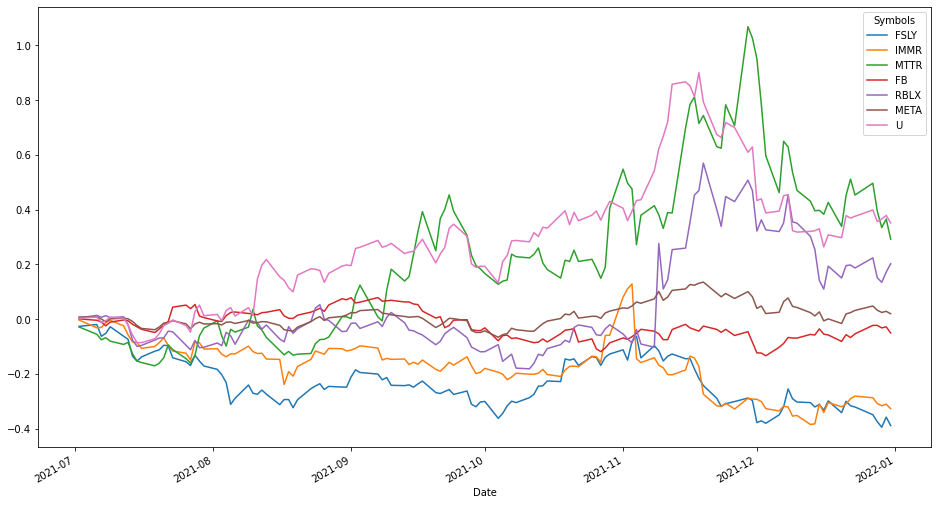

In [38]:
return_series_adj.plot(figsize=(16,9))

In [86]:
### Check for annualised return 
annualized_return = (1+return_series_adj.tail(1))**(1/(1/2))-1
annualized_return

Symbols,FSLY,IMMR,MTTR,FB,RBLX,META,U
Date,,,,,,,
2021-12-31,-0.626684,-0.547668,0.668268,-0.099218,0.444926,0.039332,0.825205


<AxesSubplot:xlabel='Date'>

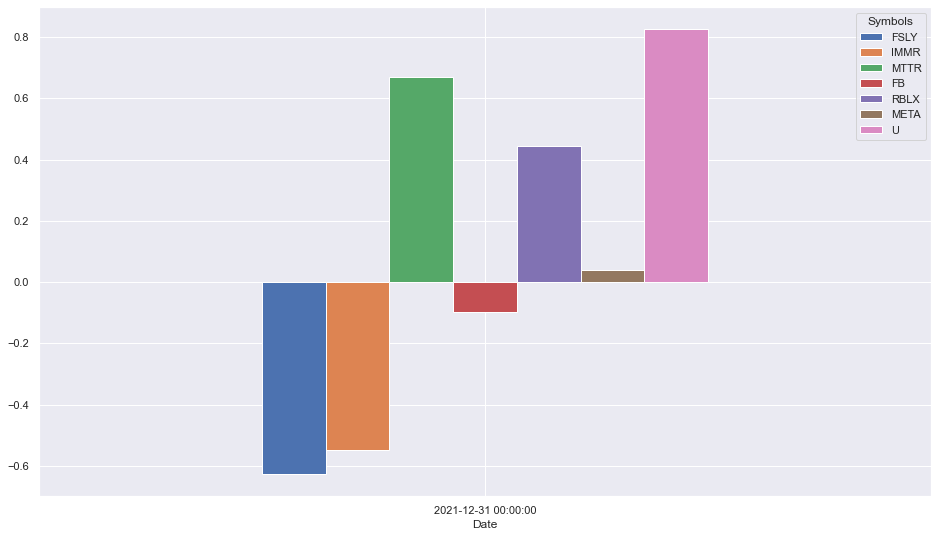

In [87]:
annualized_return.plot.bar(rot=0, figsize=(16,9))

<AxesSubplot:xlabel='Symbols'>

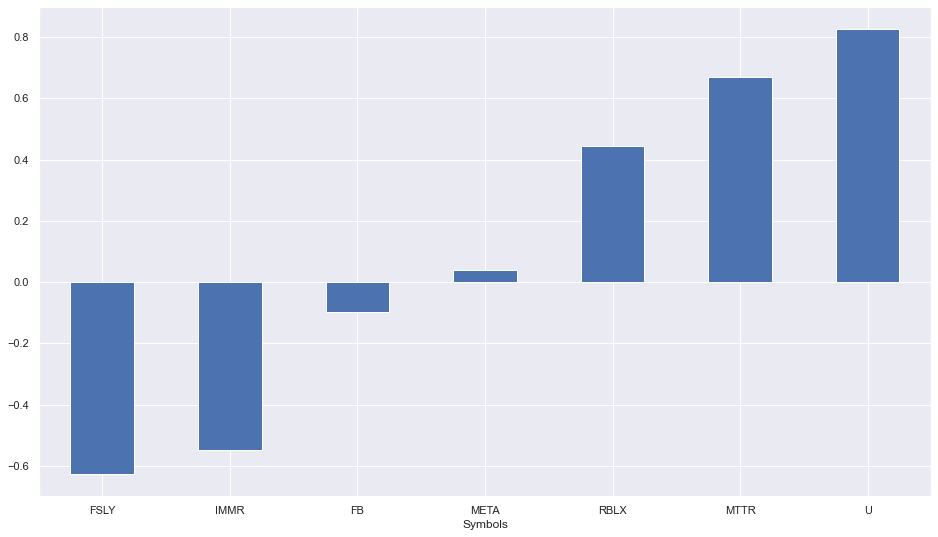

In [88]:
annualized_return = annualized_return.squeeze()
annualized_return.sort_values(ascending=True).plot.bar(rot=0, figsize=(16,9))

In [50]:
### Find Corr between these stocks
return_series_close = (close_data.pct_change()+ 1).cumprod() - 1
# return_series_close.plot(figsize=(16,9))
return_series_close.corr()

Symbols,FSLY,IMMR,MTTR,FB,RBLX,META,U
Symbols,,,,,,,
FSLY,1.000000,0.752096,-0.340674,0.143627,-0.292402,0.118209,-0.178312
IMMR,0.752096,1.000000,-0.538718,0.371890,-0.601461,-0.221621,-0.433370
MTTR,-0.340674,-0.538718,1.000000,-0.551624,0.751918,0.717298,0.842312
FB,0.143627,0.371890,-0.551624,1.000000,-0.315771,-0.181372,-0.421358
RBLX,-0.292402,-0.601461,0.751918,-0.315771,1.000000,0.788873,0.674072
META,0.118209,-0.221621,0.717298,-0.181372,0.788873,1.000000,0.824870
U,-0.178312,-0.433370,0.842312,-0.421358,0.674072,0.824870,1.000000


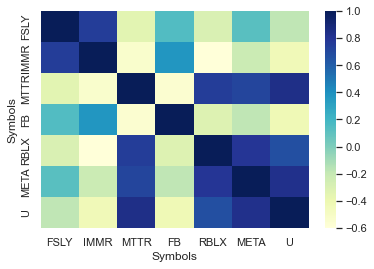

In [66]:
import seaborn as sb
dataplot = sns.heatmap(return_series_close.corr(), cmap="YlGnBu")

In [81]:
### Volatility
ahv = np.sqrt(np.log(close_data / close_data.shift(1)).var()) * np.sqrt(252)
ahv

Symbols
FSLY    0.604747
IMMR    0.671476
MTTR    0.893507
FB      0.285425
RBLX    0.803292
META    0.225529
U       0.557059
dtype: float64

<AxesSubplot:xlabel='Symbols'>

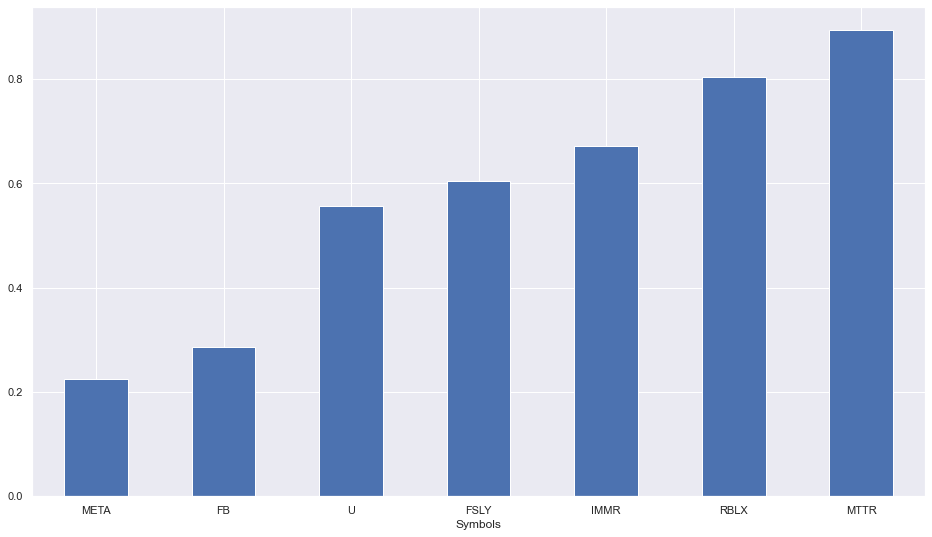

In [71]:
ahv.sort_values(ascending=True).plot.bar(rot=0, figsize=(16,9))